### Análisis Descriptivo del Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar el dataset
df = pd.read_csv('avocado.csv')  # Asegúrate de tener el archivo en el mismo directorio

# Mostrar las primeras filas
print(df.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

## Exploracion de Datos

In [5]:
# Ver información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [6]:
# Estadísticas básicas
print(df.describe())

         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05 

In [7]:
# Ver columnas y tipos
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


## Visualizaciones Exploratorias

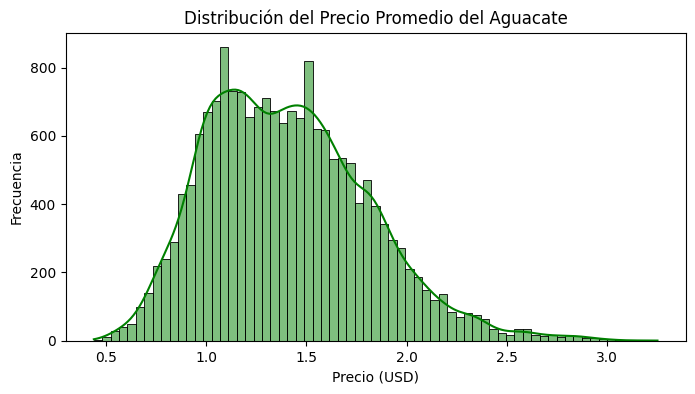

In [8]:
# Histograma del precio promedio
plt.figure(figsize=(8, 4))
sns.histplot(df['AveragePrice'], kde=True, color='green')
plt.title('Distribución del Precio Promedio del Aguacate')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

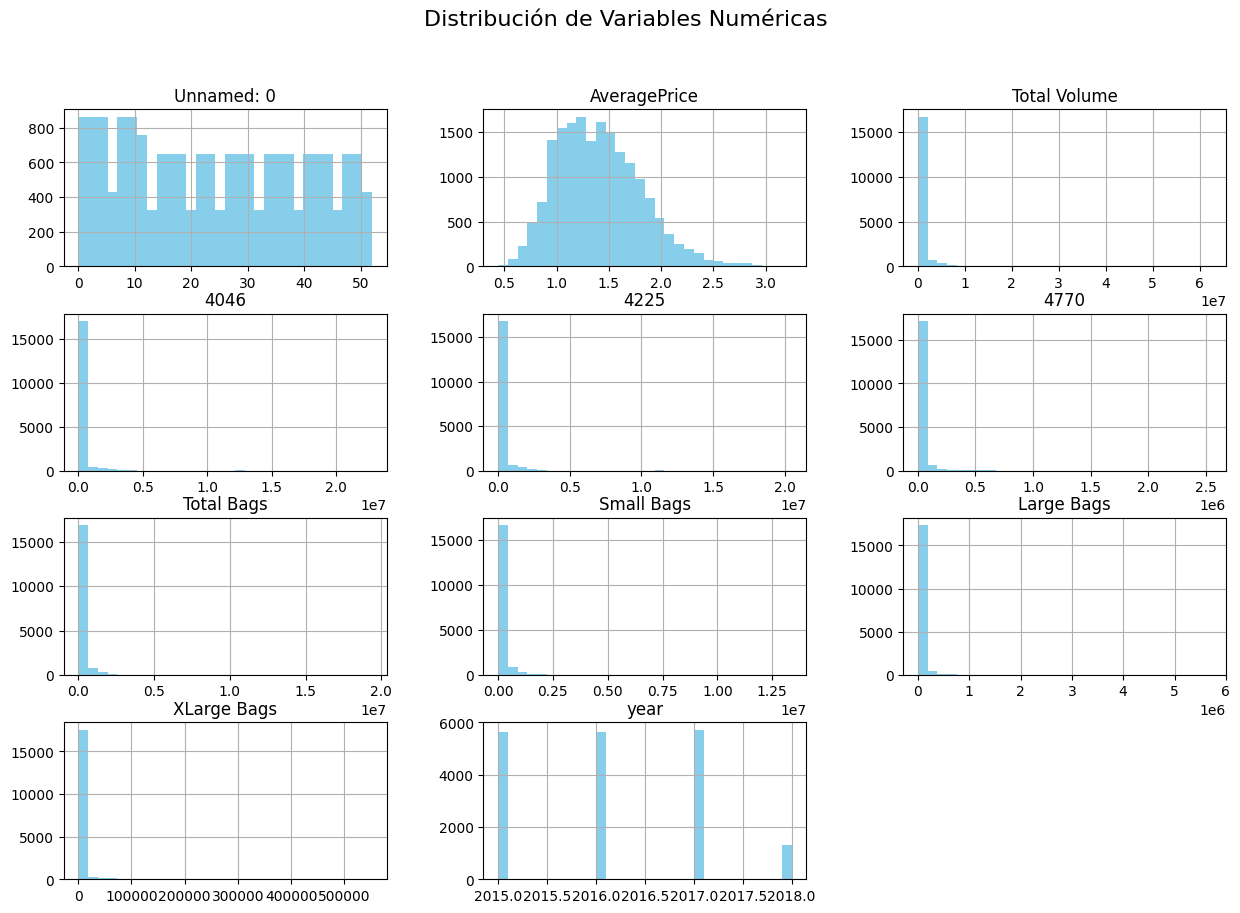

In [9]:
# Variables numericas
df.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

C:\Users\thejo\AppData\Local\Temp\ipykernel_12228\2905762477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='AveragePrice', data=df, palette='pastel')


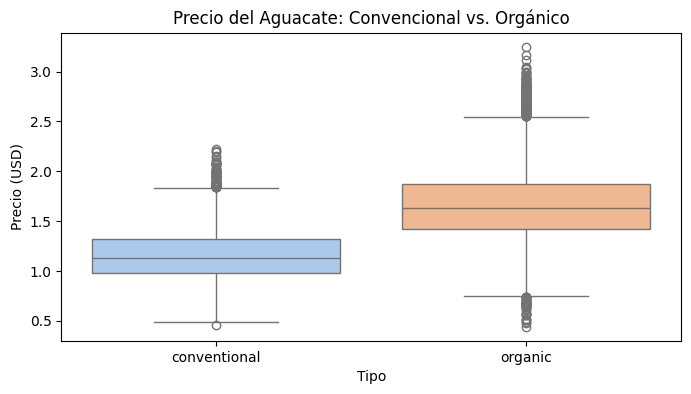

In [10]:
# Boxplot del precio por tipo (convencional vs. orgánico)
plt.figure(figsize=(8, 4))
sns.boxplot(x='type', y='AveragePrice', data=df, palette='pastel')
plt.title('Precio del Aguacate: Convencional vs. Orgánico')
plt.xlabel('Tipo')
plt.ylabel('Precio (USD)')
plt.show()

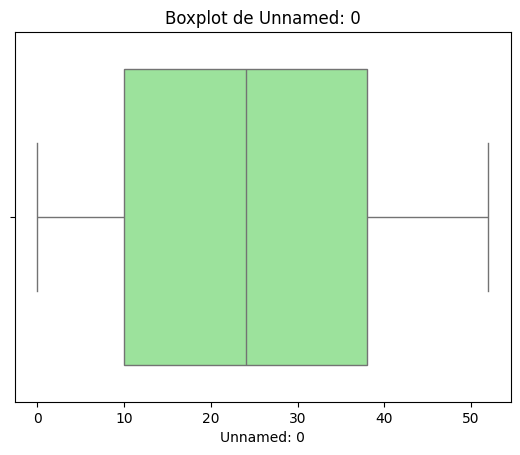

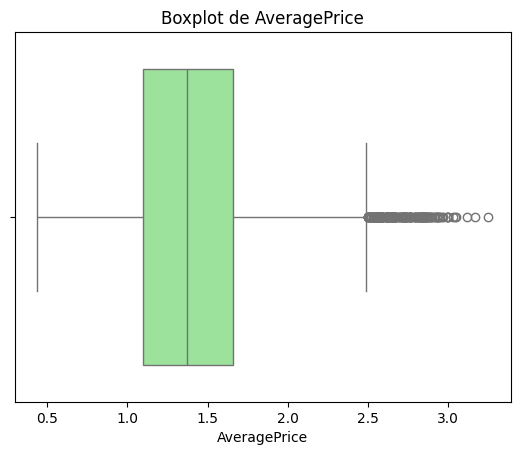

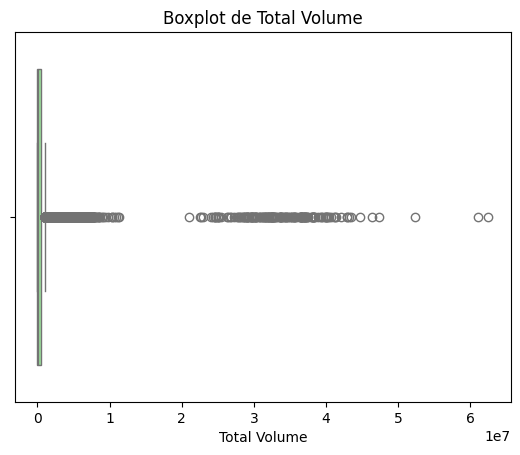

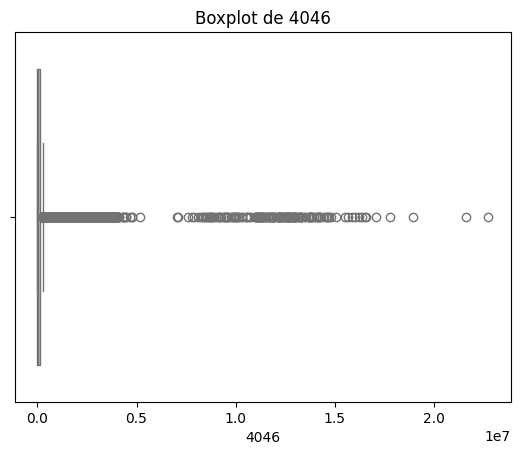

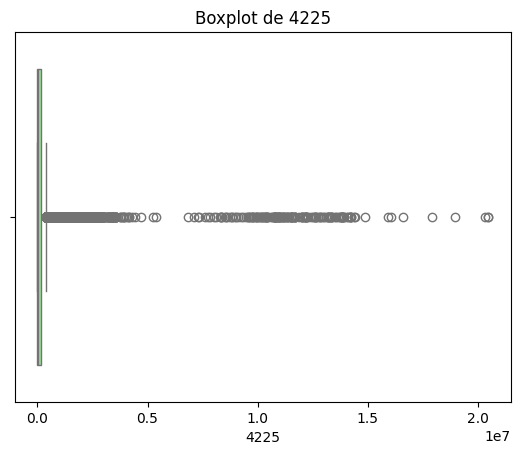

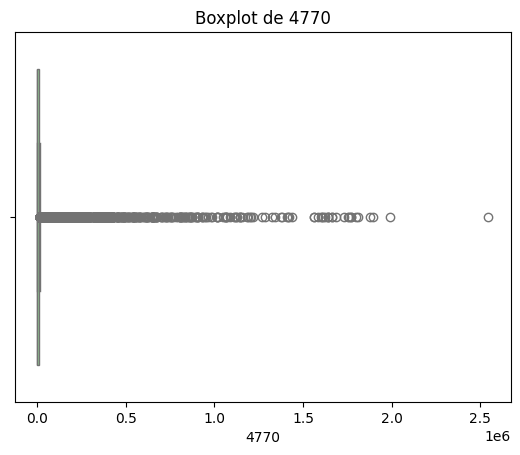

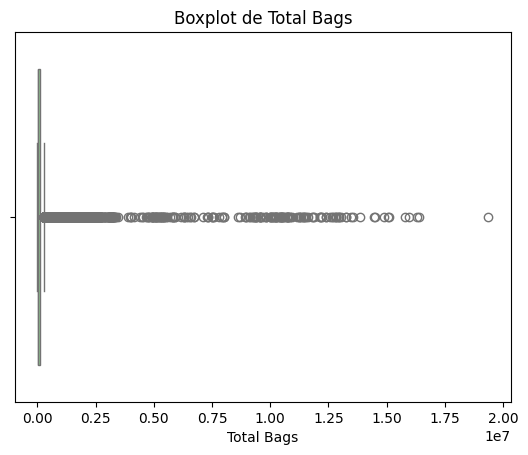

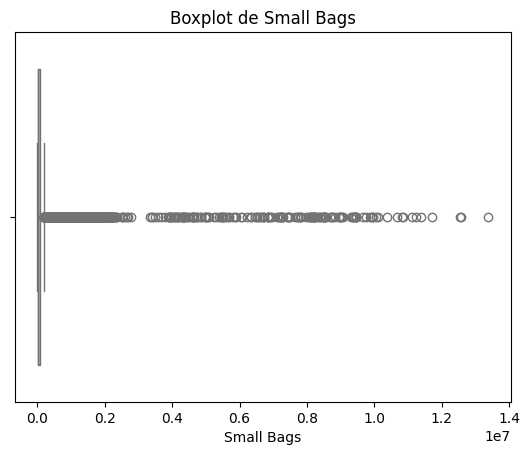

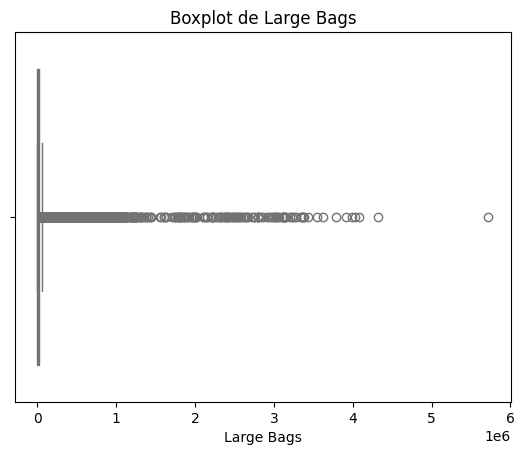

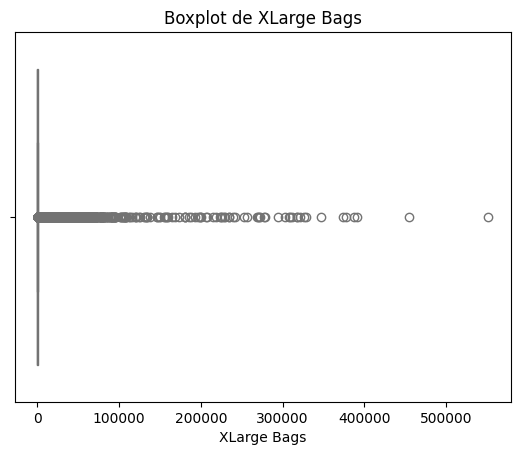

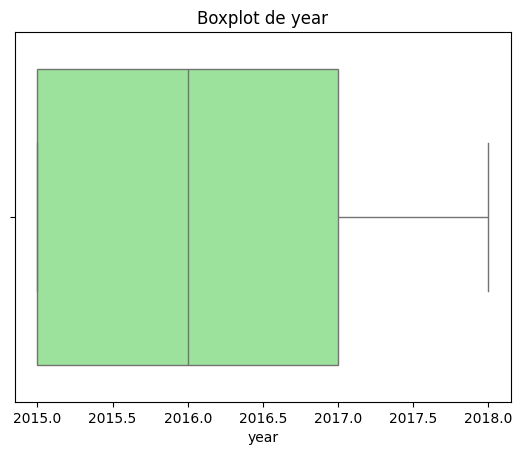

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f'Boxplot de {col}')
    plt.show()

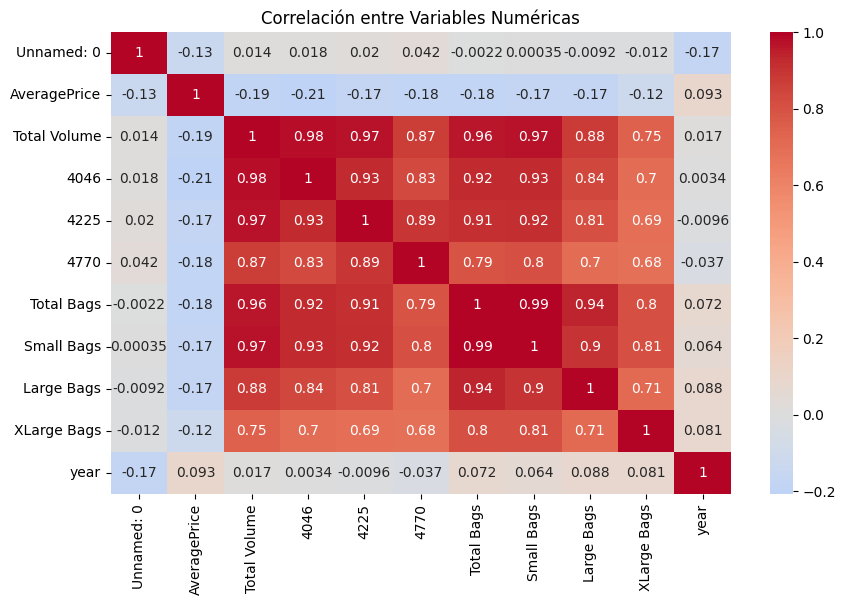

In [12]:
# Calcular correlación
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Variables Numéricas')
plt.show()

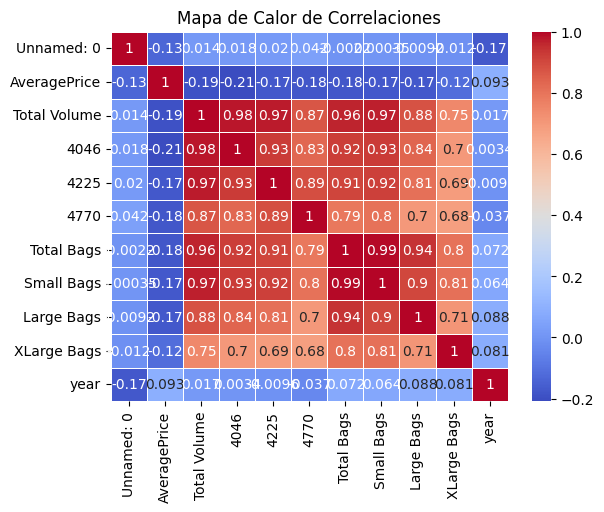

In [13]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

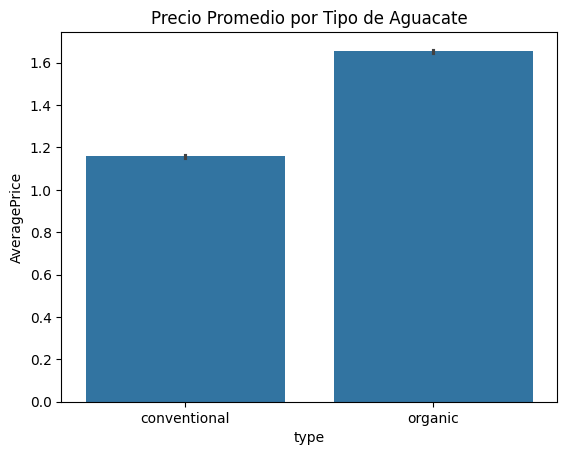

In [14]:
# Precio promedio por tipo de aguacate
sns.barplot(data=df, x="type", y="AveragePrice")
plt.title("Precio Promedio por Tipo de Aguacate")
plt.show()

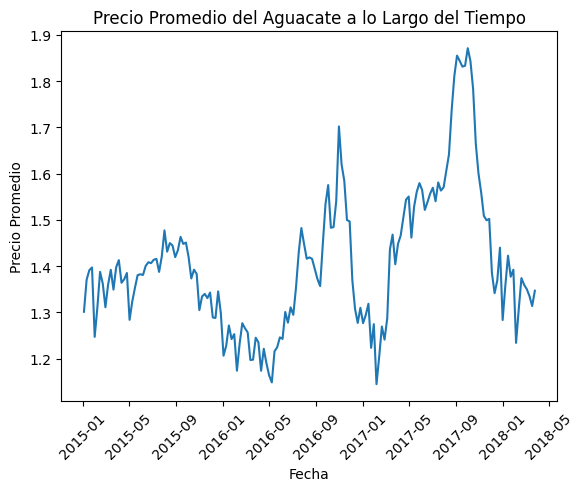

In [15]:
# Evolución del precio en el tiempo
df['Date'] = pd.to_datetime(df['Date'])
df_grouped = df.groupby("Date")["AveragePrice"].mean().reset_index()

sns.lineplot(data=df_grouped, x="Date", y="AveragePrice")
plt.title("Precio Promedio del Aguacate a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.show()

### Limpieza y Normalización del Dataset

In [16]:
# Conversion de la fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Extraer columnas útiles
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [18]:
# Eliminar columnas innecesarias
df = df.drop(columns=['Unnamed: 0'], errors='ignore')  # Solo si existe

In [19]:
# Verificar valores nulos
print(df.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Year            0
Month           0
Day             0
dtype: int64


## Manejo de outliers (opcional)

In [20]:
q1 = df['AveragePrice'].quantile(0.25)
q3 = df['AveragePrice'].quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

df = df[(df['AveragePrice'] >= lim_inf) & (df['AveragePrice'] <= lim_sup)]


In [21]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

In [22]:
# Normalización o Estandarización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['AveragePrice', 'Total Volume', '4046', '4225', '4770']
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

###  Implementación de Modelos Predictivos

In [27]:
# Division del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Eliminar la columna 'Date' y otras no necesarias
df_encoded = df_encoded.drop(columns=['Date', 'Year', 'Month', 'Day'], errors='ignore')

# Division del dataset
X = df_encoded.drop(columns=['AveragePrice'])  # Variables independientes
y = df_encoded['AveragePrice']                # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresion Lineal

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

r2_lr = r2_score(y_test, y_pred_lr)

### Árbol de Decisión

In [30]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

r2_dt = r2_score(y_test, y_pred_dt)

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)

### XGBoost Regressor

In [33]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

r2_xgb = r2_score(y_test, y_pred_xgb)